In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [5]:
dayTrain_folder = "dayTrain/"
filename = "imageDataset.csv"

daySequence1_folder = "daySequence1/"
daySequence2_folder = "daySequence2/"
filenameSequence1 = "imageDataset1.csv"
filenameSequence2 = "imageDataset2.csv"

# Train Data

[13830 15113   755]


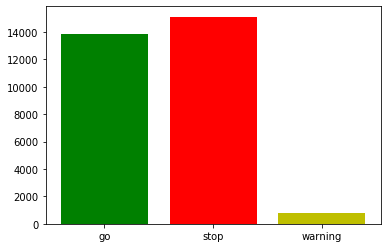

In [19]:
dayTrain = pd.read_csv(dayTrain_folder+filename)

X_train = dayTrain.drop(["filename", "target", "x1", "y1", "x2", "y2"], axis=1)
y_train = dayTrain["target"]

index, counts = np.unique(y_train, return_counts=True)
colors = ["g", "r", "y"]
plt.bar(index, counts, color=colors)
print(counts)

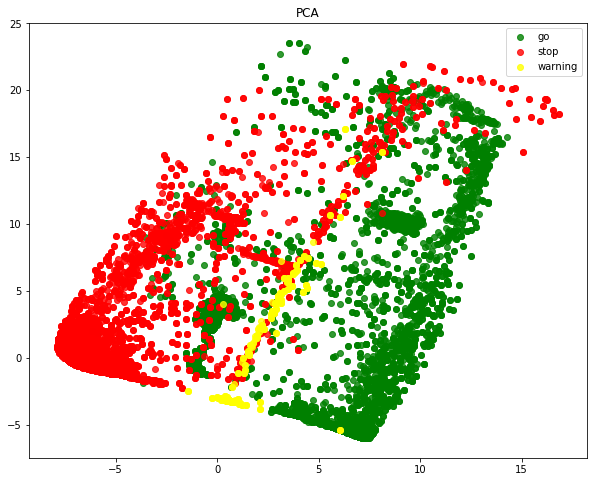

In [24]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_train)
y_r = pd.Series(y_train.values.ravel())

colors = ['green', 'red', 'yellow']
plt.figure(figsize=(10,8))
plt.scatter(X_r[y_r == "go", 0], X_r[y_r == "go", 1], color=colors[0], alpha=.8, label="go")
plt.scatter(X_r[y_r == "stop", 0], X_r[y_r == "stop", 1], color=colors[1], alpha=.8, label="stop")
plt.scatter(X_r[y_r == "warning", 0], X_r[y_r == "warning", 1], color=colors[2], alpha=.8, label="warning")
plt.legend(loc="best")
plt.title('PCA')
plt.show()

# Test Data

[6959 6962  404]


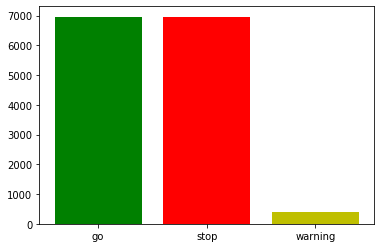

In [20]:
daySequence1 = pd.read_csv(daySequence1_folder+filenameSequence1)
daySequence2 = pd.read_csv(daySequence2_folder+filenameSequence2)
daySequenceTest = pd.concat([daySequence1, daySequence2])

X_test = daySequenceTest.drop(["filename", "target", "x1", "y1", "x2", "y2"], axis=1)
y_test = daySequenceTest["target"]

index, counts = np.unique(y_test, return_counts=True)
colors = ["g", "r", "y"]
plt.bar(index, counts, color=colors)
print(counts)

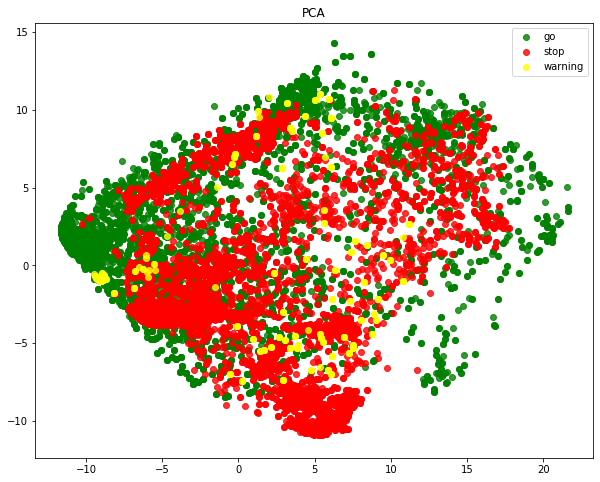

In [21]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_test)
y_r = pd.Series(y_test.values.ravel())

colors = ['green', 'red', 'yellow']
plt.figure(figsize=(10,8))
plt.scatter(X_r[y_r == "go", 0], X_r[y_r == "go", 1], color=colors[0], alpha=.8, label="go")
plt.scatter(X_r[y_r == "stop", 0], X_r[y_r == "stop", 1], color=colors[1], alpha=.8, label="stop")
plt.scatter(X_r[y_r == "warning", 0], X_r[y_r == "warning", 1], color=colors[2], alpha=.8, label="warning")
plt.legend(loc="best")
plt.title('PCA')
plt.show()

# Results

In [22]:
kernel = 'poly'
C = 1
gamma = 10
degree = 3
svc = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree).fit(X_train, y_train.values.ravel())

In [23]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

          go       0.93      0.94      0.94      6959
        stop       0.94      0.94      0.94      6962
     warning       0.94      0.81      0.87       404

    accuracy                           0.94     14325
   macro avg       0.94      0.90      0.92     14325
weighted avg       0.94      0.94      0.94     14325

